<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# DX Library

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import sys
sys.path.append('../python3/dxa')

## DX Frame

In [4]:
from dx_frame import *

### Risk-Neutral Discounting

In [5]:
dates = [dt.datetime(2015, 1, 1), dt.datetime(2015, 7, 1), dt.datetime(2016, 1, 1)]

In [6]:
deltas = [0.0, 0.5, 1.0]

In [7]:
csr = constant_short_rate('csr', 0.05)

In [8]:
csr.get_discount_factors(dates)

array([[datetime.datetime(2015, 1, 1, 0, 0), 0.951229424500714],
       [datetime.datetime(2015, 7, 1, 0, 0), 0.9755103387657228],
       [datetime.datetime(2016, 1, 1, 0, 0), 1.0]], dtype=object)

In [9]:
deltas = get_year_deltas(dates)
deltas

array([ 0.        ,  0.49589041,  1.        ])

In [10]:
csr.get_discount_factors(deltas, dtobjects=False)

array([[ 0.        ,  0.95122942],
       [ 0.49589041,  0.97551034],
       [ 1.        ,  1.        ]])

### Market Environment

In [11]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))

In [12]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2015, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
me_gbm.add_constant('paths', 10000)

In [13]:
me_gbm.add_curve('discount_curve', csr)

## DX Simulation

In [14]:
from sn_random_numbers import *

In [15]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False, moment_matching=False, fixed_seed=True)
snrn

array([[[-0.8044583 ,  0.32093155],
        [-0.02548288,  0.64432383]],

       [[-0.30079667,  0.38947455],
        [-0.1074373 , -0.47998308]]])

In [16]:
snrn = sn_random_numbers((2, 2, 2), antithetic=False, moment_matching=True, fixed_seed=True)
snrn

array([[[-1.67972865,  0.81075283],
        [ 0.04413963,  1.52641815]],

       [[-0.56512826,  0.96243813],
        [-0.13722505, -0.96166678]]])

In [17]:
snrn.mean()

-1.3877787807814457e-17

### Geometric Brownian Motion

In [18]:
from dx_frame import *

In [19]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))

In [20]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2015, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
  # monthly frequency (respcective month end)
me_gbm.add_constant('paths', 10000)

In [21]:
csr = constant_short_rate('csr', 0.06)

In [22]:
me_gbm.add_curve('discount_curve', csr)

In [23]:
from geometric_brownian_motion import geometric_brownian_motion

In [24]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [25]:
gbm.generate_time_grid()

In [26]:
gbm.time_grid

array([datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2015, 1, 31, 0, 0),
       datetime.datetime(2015, 2, 28, 0, 0),
       datetime.datetime(2015, 3, 31, 0, 0),
       datetime.datetime(2015, 4, 30, 0, 0),
       datetime.datetime(2015, 5, 31, 0, 0),
       datetime.datetime(2015, 6, 30, 0, 0),
       datetime.datetime(2015, 7, 31, 0, 0),
       datetime.datetime(2015, 8, 31, 0, 0),
       datetime.datetime(2015, 9, 30, 0, 0),
       datetime.datetime(2015, 10, 31, 0, 0),
       datetime.datetime(2015, 11, 30, 0, 0),
       datetime.datetime(2015, 12, 31, 0, 0)], dtype=object)

In [27]:
%time paths_1 = gbm.get_instrument_values()

CPU times: user 5.03 ms, sys: 1.67 ms, total: 6.7 ms
Wall time: 5.86 ms


In [28]:
paths_1

array([[ 36.        ,  36.        ,  36.        , ...,  36.        ,
         36.        ,  36.        ],
       [ 37.40294432,  38.1202286 ,  34.39982796, ...,  36.25237338,
         35.08385942,  39.66803061],
       [ 39.52141274,  42.25526228,  32.4373032 , ...,  34.85854718,
         33.65945317,  37.68717766],
       ..., 
       [ 40.49192111,  33.44349499,  23.52000117, ...,  37.87510754,
         30.14200933,  30.47215628],
       [ 42.4832345 ,  36.9254123 ,  21.90666563, ...,  36.03678387,
         30.9275866 ,  30.73817091],
       [ 43.76599201,  37.80507666,  24.12339514, ...,  36.28631617,
         28.15660098,  29.06263533]])

In [29]:
gbm.update(volatility=0.5)

In [30]:
%time paths_2 = gbm.get_instrument_values()

CPU times: user 6.3 ms, sys: 1.39 ms, total: 7.7 ms
Wall time: 6.72 ms


(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

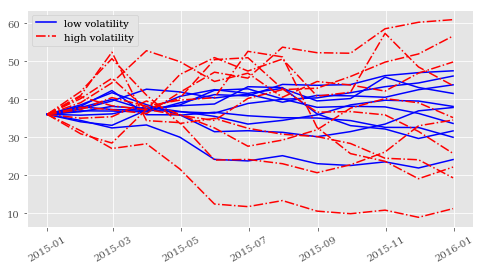

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 4))
p1 = plt.plot(gbm.time_grid, paths_1[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_2[:, :10], 'r-.')
plt.grid(True)
l1 = plt.legend([p1[0], p2[0]],
                ['low volatility', 'high volatility'], loc=2)
plt.gca().add_artist(l1)
plt.xticks(rotation=30)
# tag: gbm_class_fig
# title: Simulated paths from geometric Brownian motion simulation class

### Jump Diffusion

In [32]:
me_jd = market_environment('me_jd', dt.datetime(2015, 1, 1))

In [33]:
# specific to simulation class
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)

In [34]:
me_jd.add_environment(me_gbm)

In [35]:
from jump_diffusion import jump_diffusion

In [36]:
jd = jump_diffusion('jd', me_jd)

In [37]:
%time paths_3 = jd.get_instrument_values()

CPU times: user 16.2 ms, sys: 3.03 ms, total: 19.2 ms
Wall time: 17.9 ms


In [38]:
jd.update(lamb=0.9)

In [39]:
%time paths_4 = jd.get_instrument_values()

CPU times: user 13.5 ms, sys: 1.32 ms, total: 14.8 ms
Wall time: 13.9 ms


(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

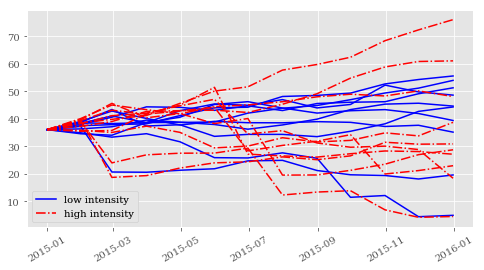

In [40]:
plt.figure(figsize=(8, 4))
p1 = plt.plot(gbm.time_grid, paths_3[:, :10], 'b')
p2 = plt.plot(gbm.time_grid, paths_4[:, :10], 'r-.')
plt.grid(True)
l1 = plt.legend([p1[0], p2[0]],
                ['low intensity', 'high intensity'], loc=3)
plt.gca().add_artist(l1)
plt.xticks(rotation=30)
# tag: jd_class_fig
# title: Simulated paths from jump diffusion simulation class

### Square-Root Diffusion

In [41]:
me_srd = market_environment('me_srd', dt.datetime(2015, 1, 1))

In [42]:
me_srd.add_constant('initial_value', .25)
me_srd.add_constant('volatility', 0.05)
me_srd.add_constant('final_date', dt.datetime(2015, 12, 31))
me_srd.add_constant('currency', 'EUR')
me_srd.add_constant('frequency', 'W')
me_srd.add_constant('paths', 10000)

In [43]:
# specific to simualation class
me_srd.add_constant('kappa', 4.0)
me_srd.add_constant('theta', 0.2)

In [44]:
# required but not needed for the class
me_srd.add_curve('discount_curve', constant_short_rate('r', 0.0))

In [45]:
from square_root_diffusion import square_root_diffusion

In [46]:
srd = square_root_diffusion('srd', me_srd)

In [47]:
srd_paths = srd.get_instrument_values()[:, :10]

(array([ 735599.,  735658.,  735719.,  735780.,  735842.,  735903.,  735964.]),
 <a list of 7 Text xticklabel objects>)

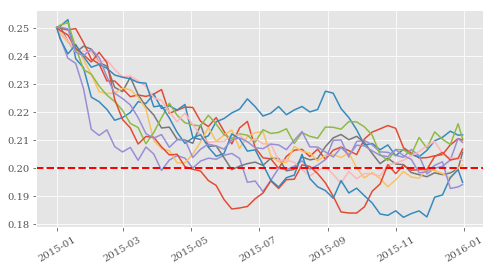

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(srd.time_grid, srd.get_instrument_values()[:, :10])
plt.axhline(me_srd.get_constant('theta'), color='r', ls='--', lw=2.0)
plt.grid(True)
plt.xticks(rotation=30)
# tag: srd_class_fig
# title: Simulated paths from square-root diffusion simulation class (dashed line = long-term mean)

## Valuation Classes

### European Options

In [49]:
from dx_simulation import *

In [50]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))

In [51]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2015, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
me_gbm.add_constant('paths', 10000)

In [52]:
csr = constant_short_rate('csr', 0.06)

In [53]:
me_gbm.add_curve('discount_curve', csr)

In [54]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [55]:
me_call = market_environment('me_call', me_gbm.pricing_date)

In [56]:
me_call.add_constant('strike', 40.)
me_call.add_constant('maturity', dt.datetime(2015, 12, 31))
me_call.add_constant('currency', 'EUR')

In [57]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [58]:
from valuation_mcs_european import valuation_mcs_european

In [59]:
eur_call = valuation_mcs_european('eur_call', underlying=gbm,
                        mar_env=me_call, payoff_func=payoff_func)

In [60]:
%time eur_call.present_value()

CPU times: user 6.95 ms, sys: 1.73 ms, total: 8.68 ms
Wall time: 7.91 ms


2.1407759999999998

In [61]:
%time eur_call.delta()

CPU times: user 5.77 ms, sys: 1.51 ms, total: 7.28 ms
Wall time: 6.07 ms


0.51480000000000004

In [62]:
%time eur_call.vega()

CPU times: user 9.76 ms, sys: 1.28 ms, total: 11 ms
Wall time: 10.1 ms


14.2782

In [63]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_call.update(initial_value=s)
    p_list.append(eur_call.present_value(fixed_seed=True))
    d_list.append(eur_call.delta())
    v_list.append(eur_call.vega())

CPU times: user 144 ms, sys: 10.2 ms, total: 154 ms
Wall time: 154 ms


In [64]:
from plot_option_stats import plot_option_stats
%matplotlib inline

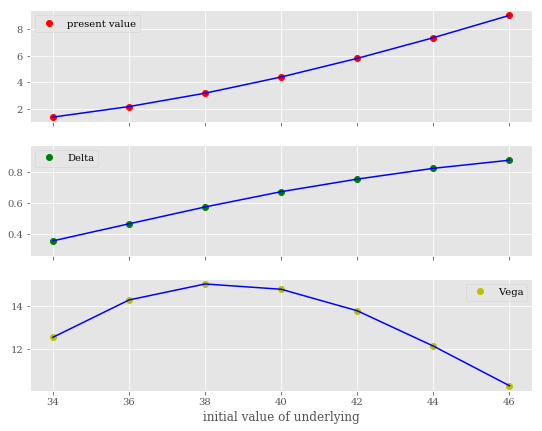

In [65]:
plot_option_stats(s_list, p_list, d_list, v_list)
# tag: option_stats_1
# title: Present value, Delta and Vega estimates for European call option
# size: 75

In [66]:
payoff_func = 'np.maximum(0.33 * (maturity_value + max_value) - 40, 0)'
  # payoff dependent on both the simulated maturity value
  # and the maximum value

In [67]:
eur_as_call = valuation_mcs_european('eur_as_call', underlying=gbm,
                            mar_env=me_call, payoff_func=payoff_func)

In [68]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_as_call.update(s)
    p_list.append(eur_as_call.present_value(fixed_seed=True))
    d_list.append(eur_as_call.delta())
    v_list.append(eur_as_call.vega())

CPU times: user 135 ms, sys: 10.2 ms, total: 146 ms
Wall time: 145 ms


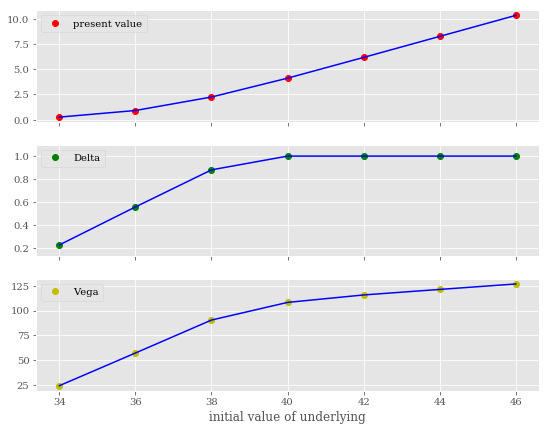

In [69]:
plot_option_stats(s_list, p_list, d_list, v_list)
# tag: option_stats_2
# title: Present value, Delta and Vega estimates for European Asian call option
# size: 75

### American Options

In [70]:
from dx_simulation import *

In [71]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))

In [72]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2016, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'W')
  # weekly frequency
me_gbm.add_constant('paths', 50000)

In [73]:
csr = constant_short_rate('csr', 0.06)

In [74]:
me_gbm.add_curve('discount_curve', csr)

In [75]:
gbm = geometric_brownian_motion('gbm', me_gbm)

In [76]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'

In [77]:
me_am_put = market_environment('me_am_put', dt.datetime(2015, 1, 1))

In [78]:
me_am_put.add_constant('maturity', dt.datetime(2015, 12, 31))
me_am_put.add_constant('strike', 40.)
me_am_put.add_constant('currency', 'EUR')

In [79]:
from valuation_mcs_american import valuation_mcs_american

In [80]:
am_put = valuation_mcs_american('am_put', underlying=gbm,
                    mar_env=me_am_put, payoff_func=payoff_func)

In [81]:
%time am_put.present_value(fixed_seed=True, bf=5)

CPU times: user 635 ms, sys: 130 ms, total: 765 ms
Wall time: 746 ms


4.4706270000000004

In [82]:
%%time
ls_table = []
for initial_value in (36., 38., 40., 42., 44.): 
    for volatility in (0.2, 0.4):
        for maturity in (dt.datetime(2015, 12, 31),
                         dt.datetime(2016, 12, 31)):
            am_put.update(initial_value=initial_value,
                          volatility=volatility,
                          maturity=maturity)
            ls_table.append([initial_value,
                             volatility,
                             maturity,
                             am_put.present_value(bf=5)])

CPU times: user 16.4 s, sys: 1.45 s, total: 17.8 s
Wall time: 17.3 s


In [83]:
print("S0  | Vola | T | Value")
print(22 * "-")
for r in ls_table:
    print("%d  | %3.1f  | %d | %5.3f" % 
          (r[0], r[1], r[2].year - 2014, r[3]))

S0  | Vola | T | Value
----------------------
36  | 0.2  | 1 | 4.444
36  | 0.2  | 2 | 4.769
36  | 0.4  | 1 | 7.000
36  | 0.4  | 2 | 8.378
38  | 0.2  | 1 | 3.210
38  | 0.2  | 2 | 3.645
38  | 0.4  | 1 | 6.066
38  | 0.4  | 2 | 7.535
40  | 0.2  | 1 | 2.267
40  | 0.2  | 2 | 2.778
40  | 0.4  | 1 | 5.203
40  | 0.4  | 2 | 6.753
42  | 0.2  | 1 | 1.554
42  | 0.2  | 2 | 2.099
42  | 0.4  | 1 | 4.459
42  | 0.4  | 2 | 6.046
44  | 0.2  | 1 | 1.056
44  | 0.2  | 2 | 1.618
44  | 0.4  | 1 | 3.846
44  | 0.4  | 2 | 5.494


In [84]:
am_put.update(initial_value=36.)
am_put.delta()

-0.46310000000000001

In [85]:
am_put.vega()

18.4939

## Portfolios

### Position

In [86]:
from dx_valuation import *

In [87]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))

In [88]:
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('currency', 'EUR')

In [89]:
me_gbm.add_constant('model', 'gbm')

In [90]:
from derivatives_position import derivatives_position

In [91]:
me_am_put = market_environment('me_am_put', dt.datetime(2015, 1, 1))

In [92]:
me_am_put.add_constant('maturity', dt.datetime(2015, 12, 31))
me_am_put.add_constant('strike', 40.)
me_am_put.add_constant('currency', 'EUR')

In [93]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'

In [94]:
am_put_pos = derivatives_position(
             name='am_put_pos',
             quantity=3,
             underlying='gbm',
             mar_env=me_am_put,
             otype='American',
             payoff_func=payoff_func)

In [95]:
am_put_pos.get_info()

NAME
am_put_pos 

QUANTITY
3 

UNDERLYING
gbm 

MARKET ENVIRONMENT

**Constants**
maturity 2015-12-31 00:00:00
strike 40.0
currency EUR

**Lists**

**Curves**

OPTION TYPE
American 

PAYOFF FUNCTION
np.maximum(strike - instrument_values, 0)


#### Portfolio

In [96]:
me_jd = market_environment('me_jd', me_gbm.pricing_date)

In [97]:
# add jump diffusion specific parameters
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)
# add other parameters from gbm
me_jd.add_environment(me_gbm)

In [98]:
# needed for portfolio valuation
me_jd.add_constant('model', 'jd')

In [99]:
me_eur_call = market_environment('me_eur_call', me_jd.pricing_date)

In [100]:
me_eur_call.add_constant('maturity', dt.datetime(2015, 6, 30))
me_eur_call.add_constant('strike', 38.)
me_eur_call.add_constant('currency', 'EUR')

In [101]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [102]:
eur_call_pos = derivatives_position(
             name='eur_call_pos',
             quantity=5,
             underlying='jd',
             mar_env=me_eur_call,
             otype='European',
             payoff_func=payoff_func)

In [103]:
underlyings = {'gbm': me_gbm, 'jd' : me_jd}
positions = {'am_put_pos' : am_put_pos, 'eur_call_pos' : eur_call_pos}

In [104]:
# discounting object for the valuation
csr = constant_short_rate('csr', 0.06)

In [105]:
val_env = market_environment('general', me_gbm.pricing_date)
val_env.add_constant('frequency', 'W')
  # monthly frequency
val_env.add_constant('paths', 25000)
val_env.add_constant('starting_date', val_env.pricing_date)
val_env.add_constant('final_date', val_env.pricing_date)
  # not yet known; take pricing_date temporarily
val_env.add_curve('discount_curve', csr)
  # select single discount_curve for whole portfolio

In [106]:
from derivatives_portfolio import derivatives_portfolio

In [107]:
portfolio = derivatives_portfolio(
                name='portfolio',
                positions=positions,
                val_env=val_env,
                assets=underlyings,
                fixed_seed=False)

In [108]:
portfolio.get_statistics(fixed_seed=False)

,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.460280,EUR,13.38084,-2.0406,30.5181
1,eur_call_pos,5,2.814638,EUR,14.07319,3.3605,42.7900


In [109]:
portfolio.get_statistics(fixed_seed=False)[['pos_value', 'pos_delta', 'pos_vega']].sum()
  # aggregate over all positions

pos_value    27.489253
pos_delta     1.271000
pos_vega     73.308100
dtype: float64

In [110]:
# portfolio.get_positions()

In [111]:
portfolio.valuation_objects['am_put_pos'].present_value()

4.4720209999999998

In [112]:
portfolio.valuation_objects['eur_call_pos'].delta()

0.64980000000000004

In [113]:
path_no = 777
path_gbm = portfolio.underlying_objects['gbm'].get_instrument_values()[
                                                            :, path_no]
path_jd = portfolio.underlying_objects['jd'].get_instrument_values()[
                                                            :, path_no]

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

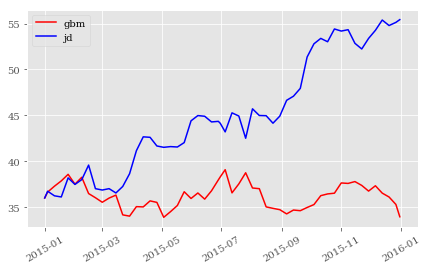

In [115]:
plt.figure(figsize=(7, 4))
plt.plot(portfolio.time_grid, path_gbm, 'r', label='gbm')
plt.plot(portfolio.time_grid, path_jd, 'b', label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0); plt.grid(True)
# tag: dx_portfolio_1
# title: Non-correlated risk factors

In [116]:
correlations = [['gbm', 'jd', 0.9]]

In [117]:
port_corr = derivatives_portfolio(
                name='portfolio',
                positions=positions,
                val_env=val_env,
                assets=underlyings,
                correlations=correlations,
                fixed_seed=True)

In [118]:
port_corr.get_statistics()

,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.458565,EUR,13.375695,-2.0313,30.1416
1,eur_call_pos,5,2.804464,EUR,14.022320,3.3760,42.3500


In [119]:
path_gbm = port_corr.underlying_objects['gbm'].\
            get_instrument_values()[:, path_no]
path_jd = port_corr.underlying_objects['jd'].\
            get_instrument_values()[:, path_no]

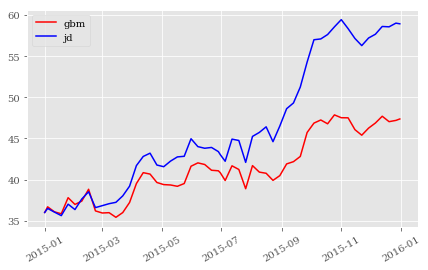

In [120]:
plt.figure(figsize=(7, 4))
plt.plot(portfolio.time_grid, path_gbm, 'r', label='gbm')
plt.plot(portfolio.time_grid, path_jd, 'b', label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0); plt.grid(True)
# tag: dx_portfolio_2
# title: Highly correlated risk factors

In [121]:
pv1 = 5 * port_corr.valuation_objects['eur_call_pos'].\
            present_value(full=True)[1]
pv1

array([  0.        ,  39.28773263,  23.82860521, ...,   0.        ,
         6.3226358 ,   7.94977565])

In [122]:
pv2 = 3 * port_corr.valuation_objects['am_put_pos'].\
            present_value(full=True)[1]
pv2

array([ 22.05537489,  10.91479057,  20.26091821, ...,  21.69302419,
        17.76714942,   0.        ])

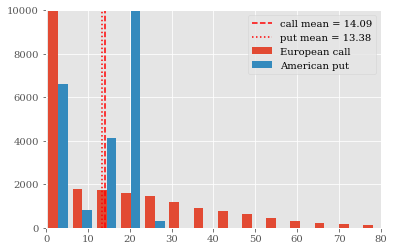

In [123]:
plt.hist([pv1, pv2], bins=25,
         label=['European call', 'American put']);
plt.axvline(pv1.mean(), color='r', ls='dashed',
            lw=1.5, label='call mean = %4.2f' % pv1.mean())
plt.axvline(pv2.mean(), color='r', ls='dotted',
            lw=1.5, label='put mean = %4.2f' % pv2.mean())
plt.xlim(0, 80); plt.ylim(0, 10000)
plt.legend()
# tag: dx_portfolio_3
# title: Frequency distributions of option position present values

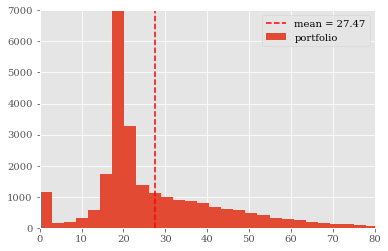

In [124]:
pvs = pv1 + pv2
plt.hist(pvs, bins=50, label='portfolio');
plt.axvline(pvs.mean(), color='r', ls='dashed',
            lw=1.5, label='mean = %4.2f' % pvs.mean())
plt.xlim(0, 80); plt.ylim(0, 7000)
plt.legend()
# tag: dx_portfolio_4
# title: Portfolio frequency distribution of present values

In [125]:
# portfolio with correlation
pvs.std()

16.736290069957963

In [126]:
# portfolio without correlation
pv1 = 5 * portfolio.valuation_objects['eur_call_pos'].\
            present_value(full=True)[1]
pv2 = 3 * portfolio.valuation_objects['am_put_pos'].\
            present_value(full=True)[1]
(pv1 + pv2).std()

21.71542409437863

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>